In [87]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings


warnings.filterwarnings("ignore")

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

In [89]:
#21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy: 
x,y = load_iris(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.3 , random_state= 42) 

In [90]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [91]:
#Train SVM Classifier 
model = SVC(kernel= 'linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [92]:
# Evaluate accuracy
y_pred = model.predict(X_test)
print("Accuracy",accuracy_score(y_pred,y_test))

Accuracy 1.0


In [93]:
# 22.  Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies: 
x,y = load_wine(return_X_y= True)

X_train,X_test,y_train,y_test =train_test_split(x,y ,test_size= 0.3,random_state=1)


In [94]:
# Train SVM with Linear Kernel
model_linear  = SVC(kernel="linear")
model_linear.fit(X_train,y_train)
y_pred_linear = model_linear.predict(X_test)
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))


Linear Kernel Accuracy: 0.9629629629629629


In [95]:
# Train SVM with RBF Kernel
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)
accuracy_score(y_pred_rbf,y_test)

0.6851851851851852

In [96]:
#23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE): 
from sklearn.datasets import fetch_california_housing
x,y = fetch_california_housing(return_X_y= True)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size= 0.5 , random_state= 42)


In [97]:
# Train SVM Regressor
model = SVR(kernel='rbf')
model.fit(X_train, y_train)


SVR()

In [98]:
# Evaluate using MSE
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.3753275947480972


In [99]:
#24.  Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary:
x,y = make_classification(n_samples= 1000 , n_features= 2 , n_informative=2,n_redundant=0,random_state= 1)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size= 0.5 , random_state= 42)

# Train SVM with Polynomial Kernel
model = SVC(kernel='poly', degree=3)
model.fit(x, y)


SVC(kernel='poly')

In [100]:
# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 100),
                     np.linspace(x[:, 1].min(), x[:, 1].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


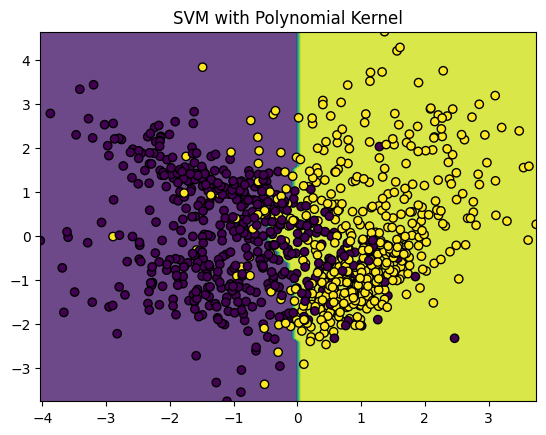

In [101]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k')
plt.title("SVM with Polynomial Kernel")
plt.show()


In [102]:
#25.  Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy: 
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

X,y = load_breast_cancer(return_X_y= True)
X_train,X_test,y_train,y_test =train_test_split(X,y ,test_size= 0.30,random_state= 1)

In [103]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [104]:
y_pred = model.predict(X_test)

In [105]:
# Evaluate accuracy

accuracy_score(y_pred,y_test)

0.9473684210526315

In [106]:
#26.  Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
news = fetch_20newsgroups(subset='all')
X , y = news.data , news.target

In [107]:
vectorizer = TfidfVectorizer()
X_trf = vectorizer.fit_transform(X)
X_train , X_test , y_train , y_test  = train_test_split(X_trf,y,test_size= 0.5 , random_state=42)



In [108]:
# Train Multinomial Naïve Bayes
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [109]:
# Evaluate accuracy
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8063249495914252

In [110]:
#27 . Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [111]:
C_values = [0.1, 1, 10]
plt.figure(figsize=(15, 5))
for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

<Figure size 1500x500 with 0 Axes>

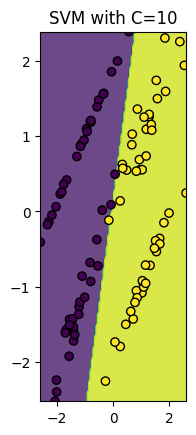

In [112]:
# Plot decision boundary
plt.subplot(1, 3, i+1)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title(f"SVM with C={C}")
plt.show()

In [113]:
#28 .Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features
from sklearn.naive_bayes import BernoulliNB

X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_classes=2, random_state=42)
X_train , X_test , y_train , y_test  = train_test_split(X,y,test_size= 0.5 , random_state=42)

In [114]:
model  = BernoulliNB()
model.fit(X_train,y_train)

BernoulliNB()

In [115]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.66

In [116]:
#29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled dataabs
from sklearn.preprocessing import StandardScaler
# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [117]:
model = SVC(kernel= 'linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [118]:
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

1.0

In [119]:
# Apply Standardization
scaler  = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
model.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [121]:
y_pred_scaled = model.predict(X_test_scaled)
print("Accuracy with scaling:", accuracy_score(y_test, y_pred_scaled))



Accuracy with scaling: 0.9777777777777777


In [122]:
#30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing 
# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [123]:
# Train Gaussian Naïve Bayes without Laplace Smoothing
model = GaussianNB(var_smoothing=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy without Laplace Smoothing:", accuracy_score(y_test, y_pred))


Accuracy without Laplace Smoothing: 0.9777777777777777


In [124]:
# Train Gaussian Naïve Bayes with Laplace Smoothing
model = GaussianNB(var_smoothing=1e-9)
model.fit(X_train, y_train)
y_pred_smooth = model.predict(X_test)
print("Accuracy with Laplace Smoothing:", accuracy_score(y_test, y_pred_smooth))


Accuracy with Laplace Smoothing: 0.9777777777777777


In [125]:
#31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)
# Load dataset
X, y = load_iris(return_X_y=True)


In [126]:
# Define parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

In [129]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf']})

In [130]:
# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Accuracy: 0.9800000000000001


In [131]:
#32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracyabs
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

In [132]:
# Train SVM with class weighting
model = SVC(kernel='linear', class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [133]:
y_pred = model.predict(X_test)
print("Accuracy with class weighting:", accuracy_score(y_test, y_pred))


Accuracy with class weighting: 0.8466666666666667


In [134]:
#33.  Write a Python program to implement a Naïve Bayes classifier for spam detection using email data
from sklearn.feature_extraction.text import CountVectorizer
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)
X, y = newsgroups.data, newsgroups.target


In [135]:
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X)


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.3, random_state=42)


In [137]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [138]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9814471243042672


In [139]:
#34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy
from sklearn.feature_selection import SelectKBest, f_classif

In [140]:
data = load_iris()
X, y = data.data, data.target

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
selector = SelectKBest(f_classif,k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [143]:
model = GaussianNB()
model.fit(X_train_selected, y_train)

GaussianNB()

In [144]:
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after feature selection: {accuracy:.2f}")


Accuracy after feature selection: 1.00


In [145]:
#36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy
# Load dataset
data = load_wine()
X, y = data.data, data.target


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [147]:
model_ovr = SVC(decision_function_shape='ovr')
model_ovr.fit(X_train, y_train)
y_pred_ovr = model_ovr.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

In [148]:
model_ovo = SVC(decision_function_shape='ovo')
model_ovo.fit(X_train, y_train)
y_pred_ovo = model_ovo.predict(X_test)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

In [149]:
print(f"OvR Accuracy: {accuracy_ovr:.2f}")
print(f"OvO Accuracy: {accuracy_ovo:.2f}")

OvR Accuracy: 0.76
OvO Accuracy: 0.76


In [150]:
#37.  Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [152]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{kernel.capitalize()} Kernel Accuracy: {accuracy:.2f}")


Linear Kernel Accuracy: 0.96
Poly Kernel Accuracy: 0.94
Rbf Kernel Accuracy: 0.94


In [153]:
#38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5)
model = SVC()


In [154]:
scores = cross_val_score(model, X, y, cv=cv)
print(f"Average Accuracy: {scores.mean():.2f}")


Average Accuracy: 0.91


In [158]:
#39.  Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance
data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

priors = [None, [0.1, 0.8, 0.1], [0.2, 0.6, 0.2]]
for prior in priors:
    model = GaussianNB(priors=prior)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with priors {prior}: {accuracy:.2f}")

Accuracy with priors None: 0.98
Accuracy with priors [0.1, 0.8, 0.1]: 1.00
Accuracy with priors [0.2, 0.6, 0.2]: 1.00


In [159]:
#40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy
from sklearn.feature_selection import RFE
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [160]:
    # RFE
model = SVC(kernel='linear')
selector = RFE(model, n_features_to_select=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [161]:
# Train and evaluate
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after RFE: {accuracy:.2f}")


Accuracy after RFE: 0.93


In [162]:
#41.  Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy
from sklearn.metrics import precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [163]:
# Train SVM
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [164]:
# Evaluate
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


Precision: 0.91, Recall: 1.00, F1-Score: 0.95


In [165]:
#42.  Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)
from sklearn.metrics import log_loss
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)


In [166]:
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss:.2f}")


Log Loss: 0.49


In [169]:
#43.  Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn
from sklearn.metrics import confusion_matrix

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


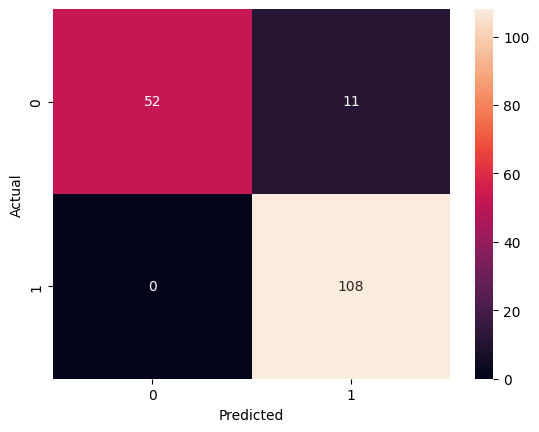

In [170]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [178]:
#44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE
from sklearn.metrics import mean_absolute_error

In [179]:
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [180]:
mean_absolute_error(y_test, y_pred)


np.float64(0.1255776932855121)

In [181]:
#45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score
from sklearn.metrics import roc_auc_score
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [182]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.99


In [186]:
#46.  Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.
data = load_breast_cancer()
X, y = data.data, data.target


model = SVC(probability=True)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]


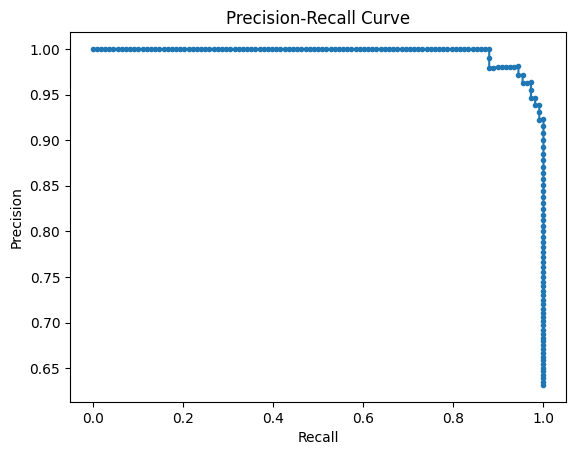

In [187]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()